### Seazone Code Challenge - Data Science
#### Gabriel Nascimento Silva

* O desafio consiste em analisar os dados de ocupação e preço de anúncios no Airbnb, a fim de responder uma série de perguntas.


### Raw Data
1. `desafio_priceav.csv` - Contém dados de ocupação e preço de anúncios
2. `desafio_details.csv` - Contém características de cada anúncio

#### Instalando & Importando Bibliotecas

In [1]:
## Se necessário, instale as seguintes bibliotecas
# !pip install sweetviz 
# !pip install ipywidgets

import sweetviz as sv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
priceav =  pd.read_csv("./raw_data/desafio_priceav.csv")
priceav

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
0,0,2148,40201349,blank,2020-11-15,250.0,0
1,1,2159,40201349,blank,2020-11-26,250.0,0
2,2,2160,40201349,blank,2020-11-27,250.0,0
3,3,2173,40201349,blank,2020-12-10,250.0,0
4,4,2226,40201349,blank,2021-02-01,250.0,0
...,...,...,...,...,...,...,...
354515,64596,4298115,40199361,blank,2021-03-26,200.0,0
354516,64597,4298116,40199361,blank,2021-03-27,200.0,0
354517,64598,4298117,40199361,2020-09-14 00:00:00,2021-03-28,250.0,1
354518,64599,4298118,40199361,2020-09-14 00:00:00,2021-03-29,250.0,1


In [3]:
# Remover as duas primeiras colunas, já que não são informativas.
priceav.drop(columns = priceav.columns[[0, 1]], axis=1, inplace = True)
report_priceav = sv.analyze(priceav)
priceav["booked_on"] = priceav["booked_on"].str.replace('blank', "")
priceav.head()

                                             |                                             | [  0%]   00:00 ->…

,airbnb_listing_id,booked_on,date,price_string,occupied
0,40201349,,2020-11-15,250.0,0
1,40201349,,2020-11-26,250.0,0
2,40201349,,2020-11-27,250.0,0
3,40201349,,2020-12-10,250.0,0
4,40201349,,2021-02-01,250.0,0


In [4]:
details =  pd.read_csv("./raw_data/desafio_details.csv")
details.head()

,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0
3,3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0
4,4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0


In [5]:
# Remover a primeira coluna, já que não é informativa.
details.drop(columns = details.columns[0], axis=1, inplace = True)
report_details = sv.analyze(details)
details.head()

                                             |                                             | [  0%]   00:00 ->…

,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0
3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0
4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0


In [6]:
print(f'O dataset priceav tem {priceav.shape[1]} colunas e {priceav.shape[0]} linhas')
print(f'O dataset details tem {details.shape[1]} colunas e {details.shape[0]} linhas')

O dataset priceav tem 5 colunas e 354520 linhas
O dataset details tem 8 colunas e 4691 linhas


### 0. Data Prep.

* Usar a biblioteca `sweetviz` para exploração inicial dos dois datasets


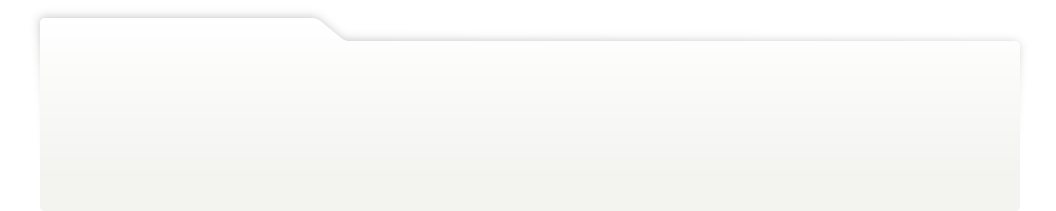
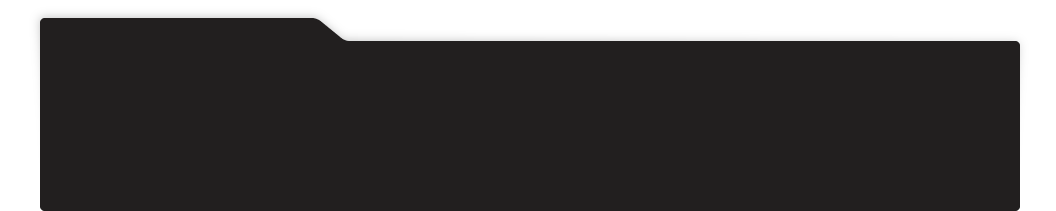
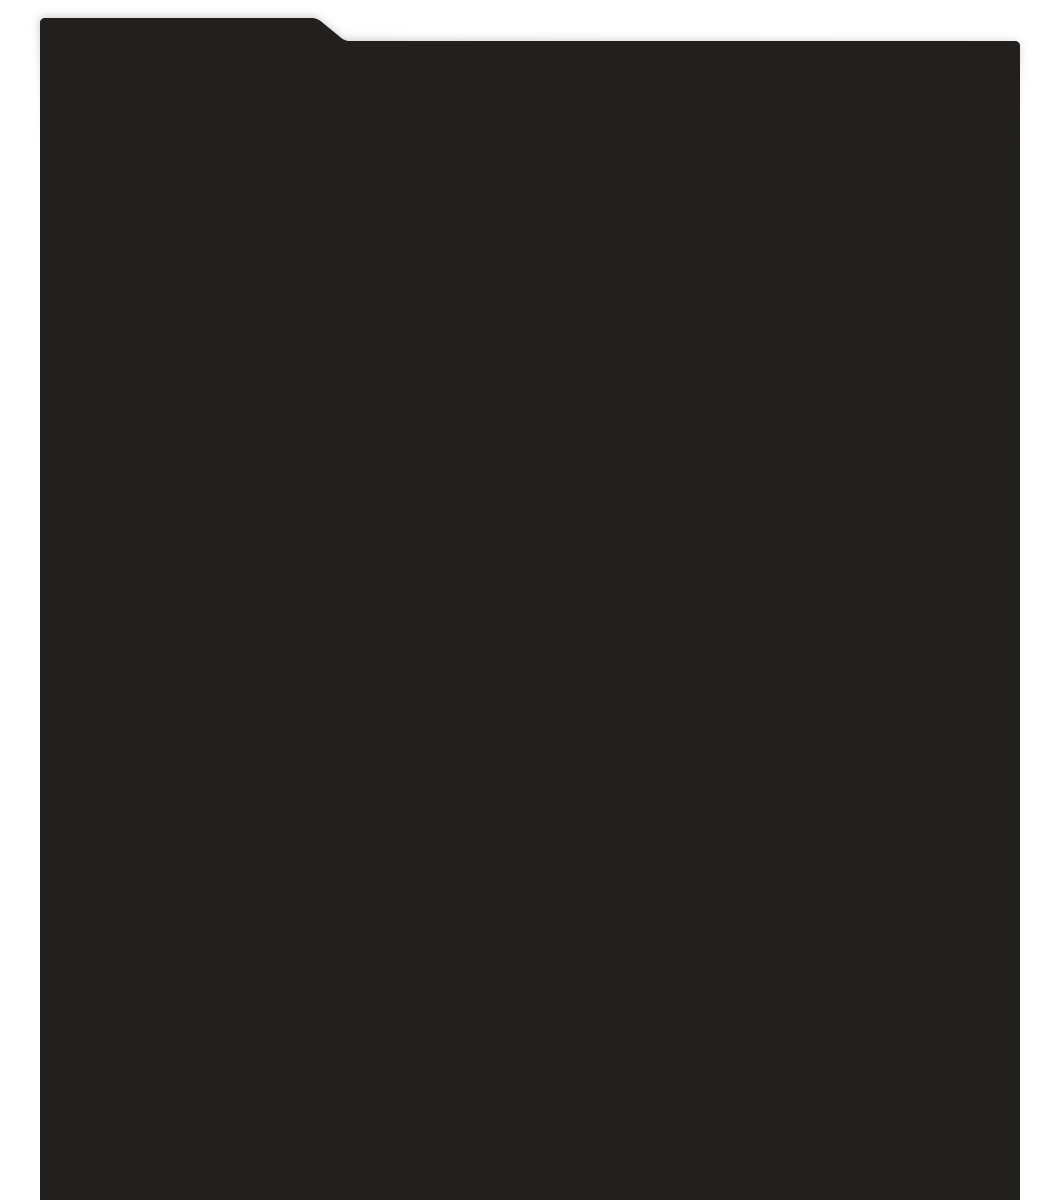
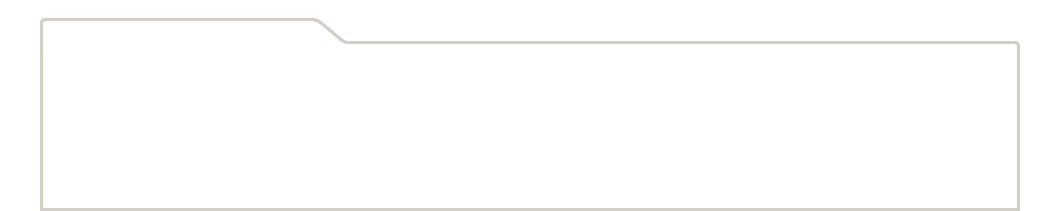
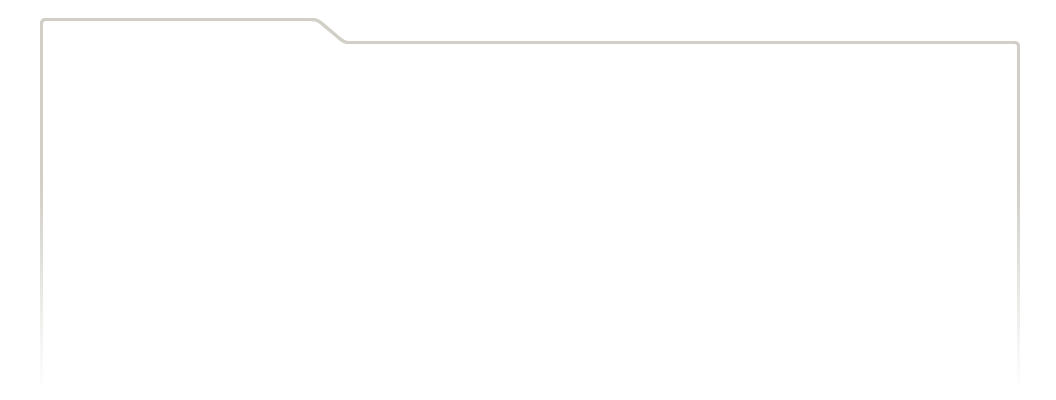
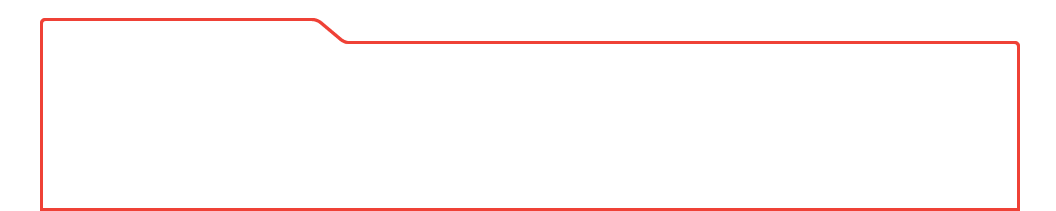
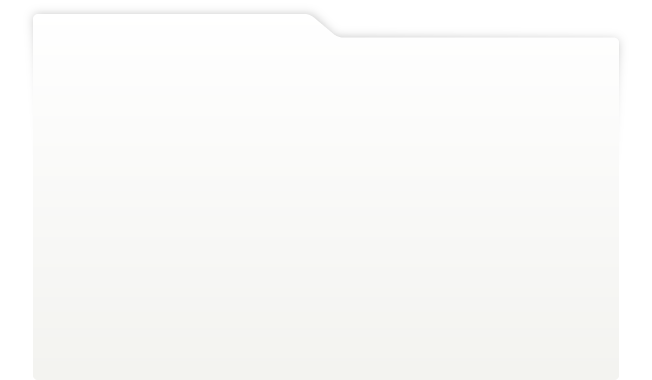
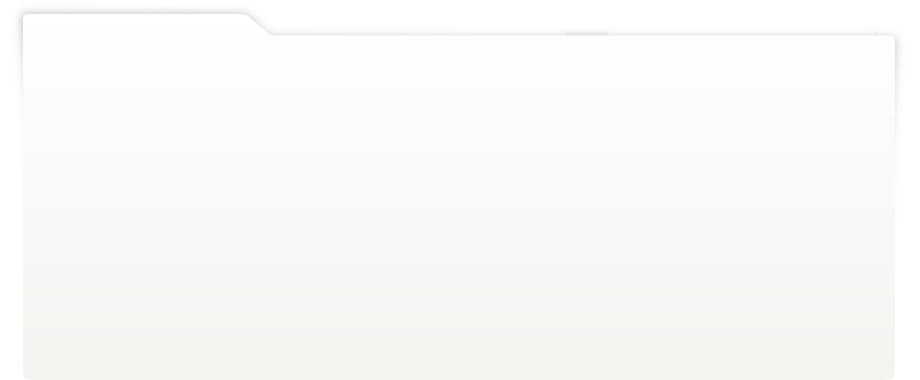
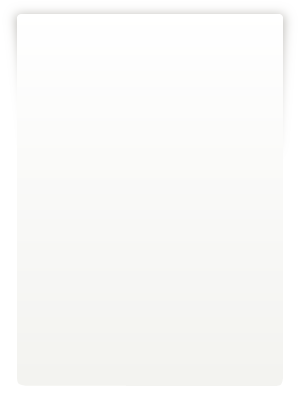
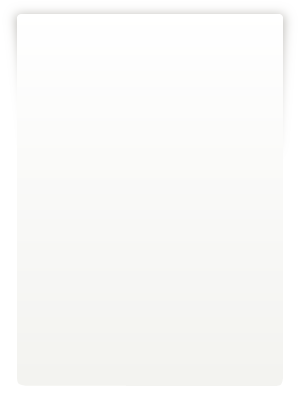
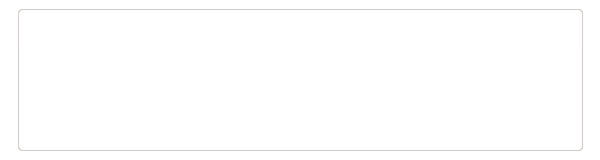
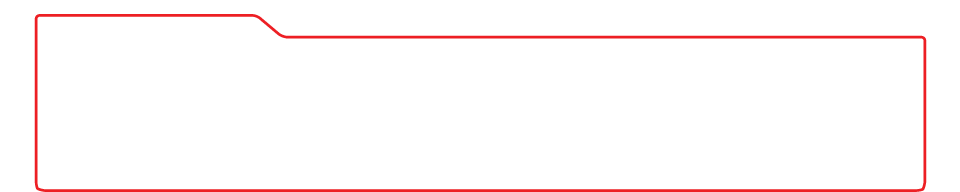
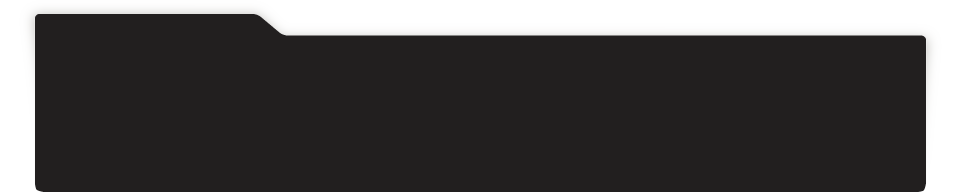
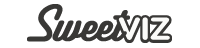
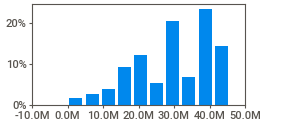
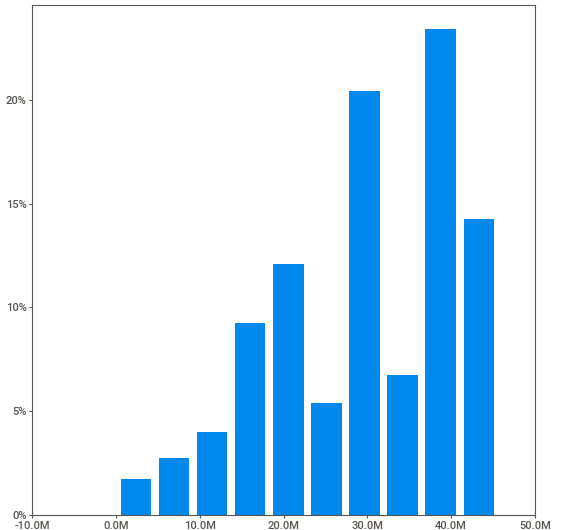
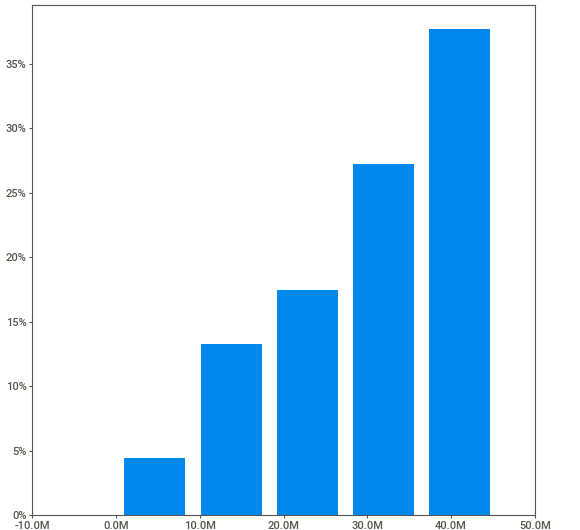
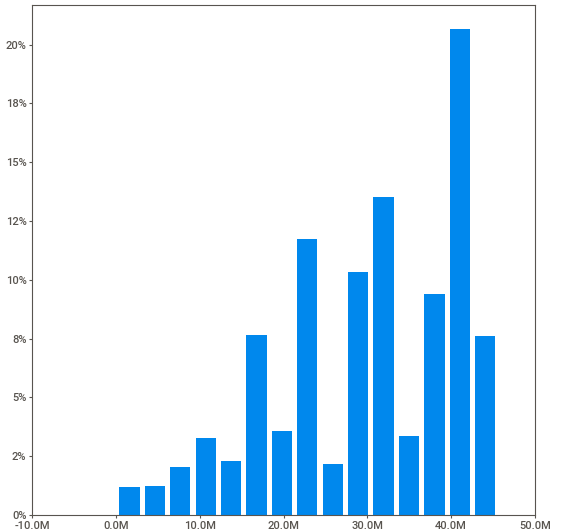
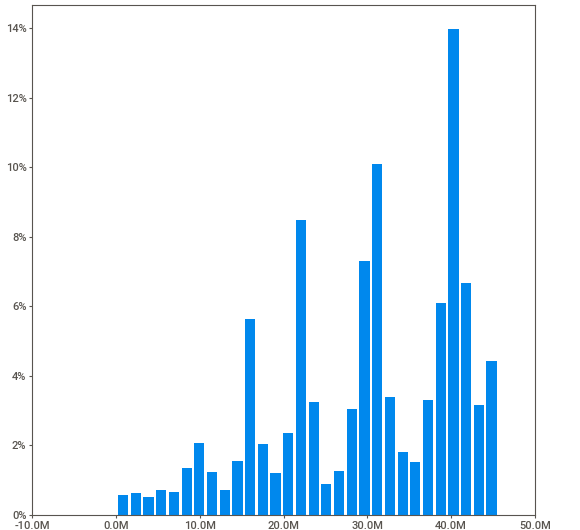
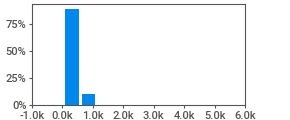
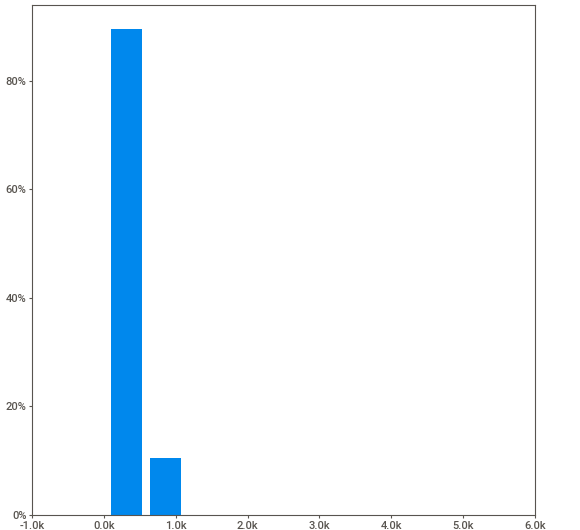
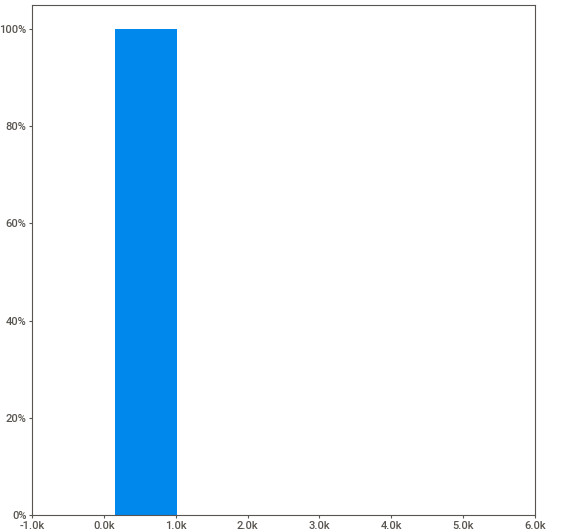
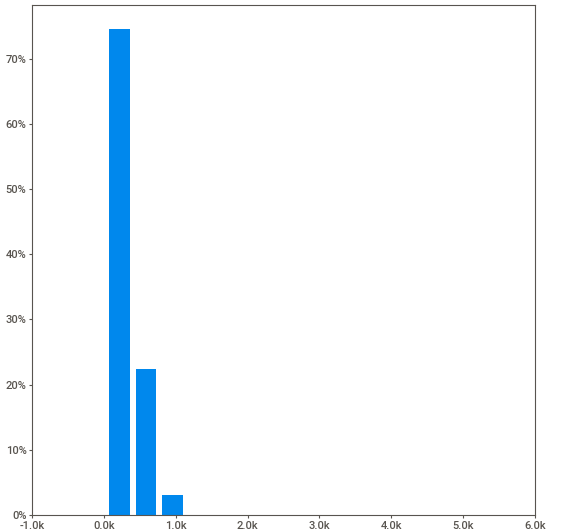
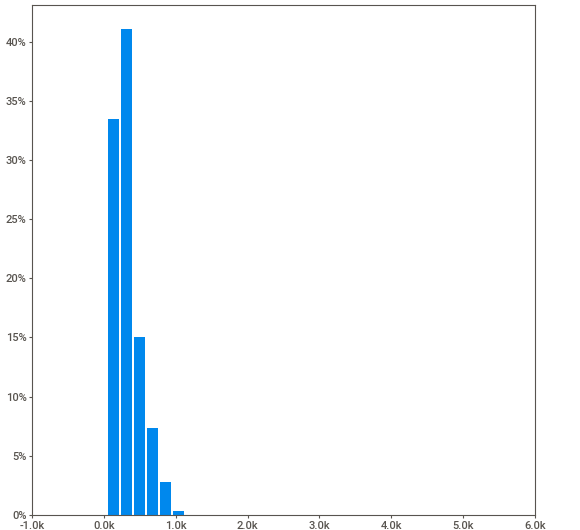
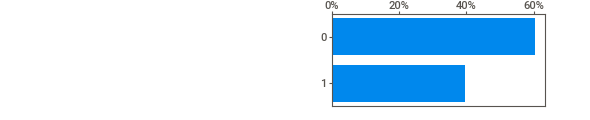
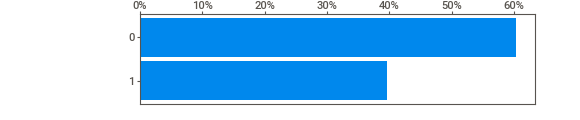
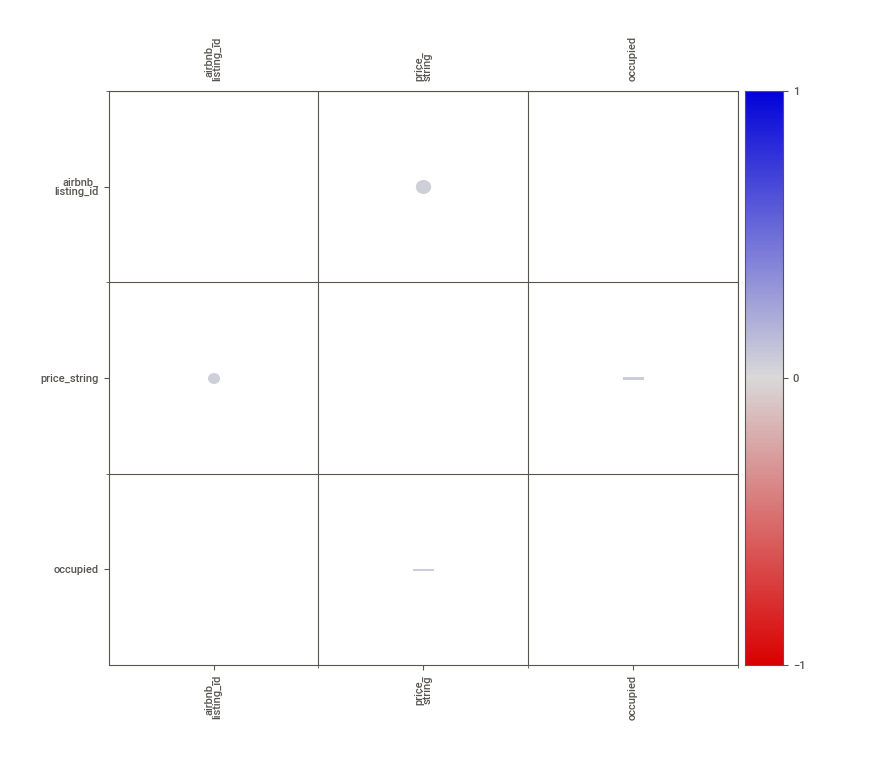
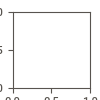

In [7]:
report_priceav.show_notebook()


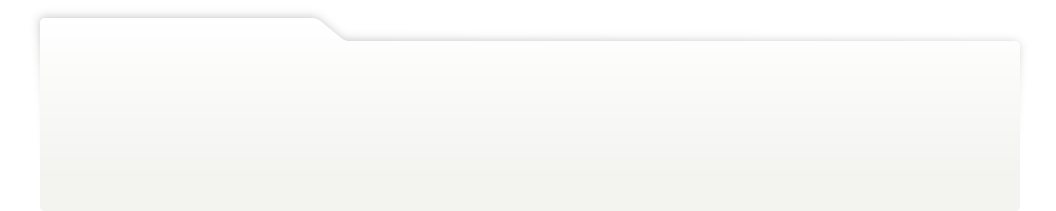
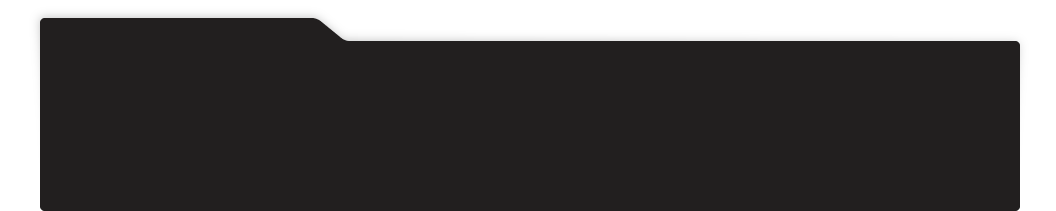
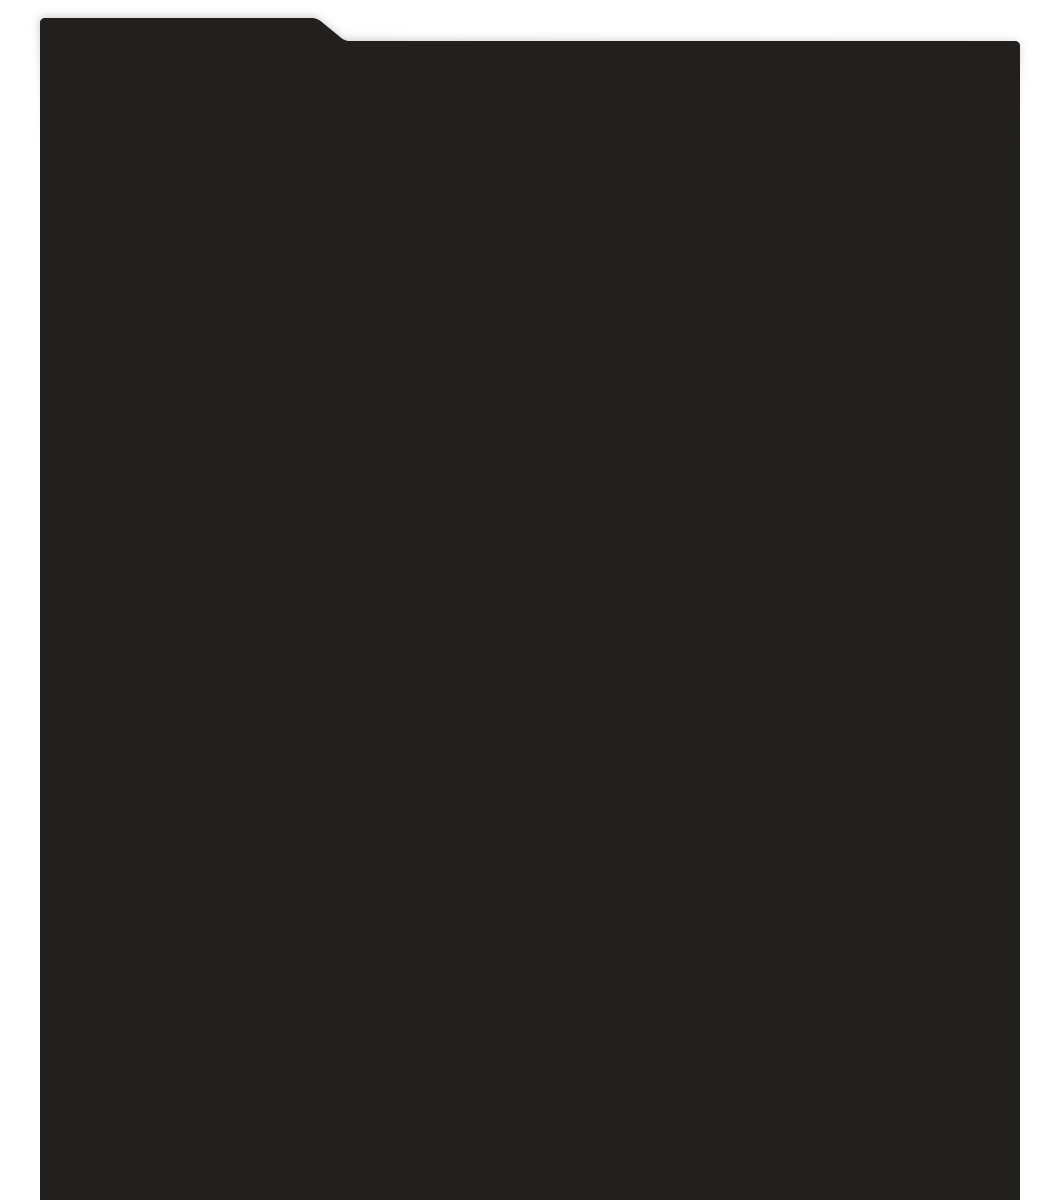
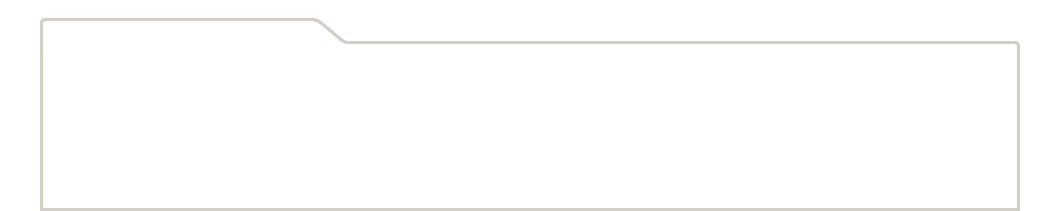
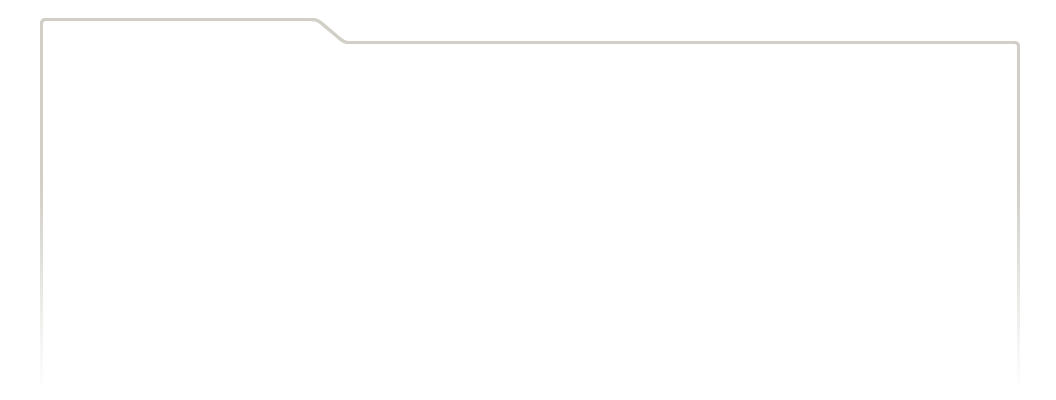
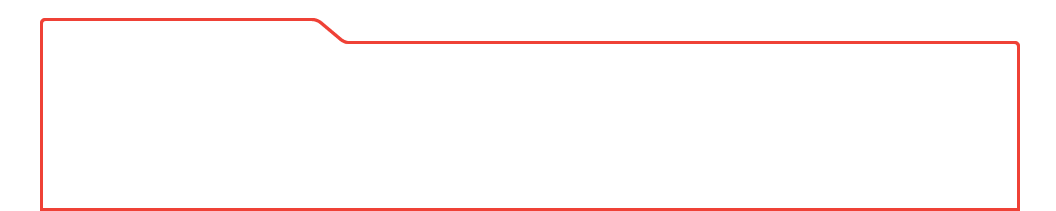
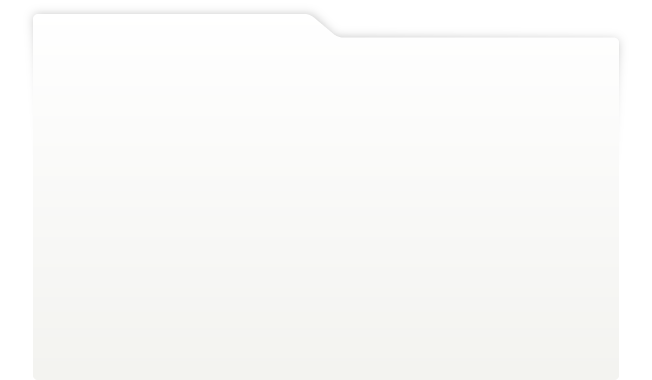
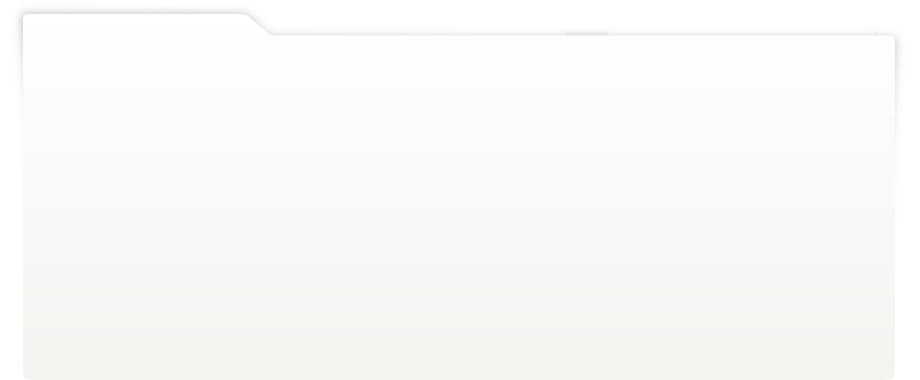
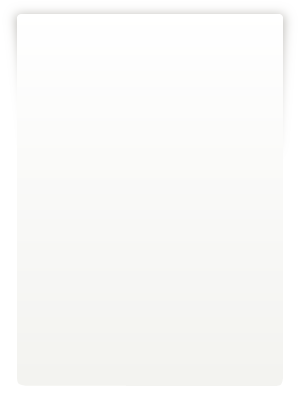
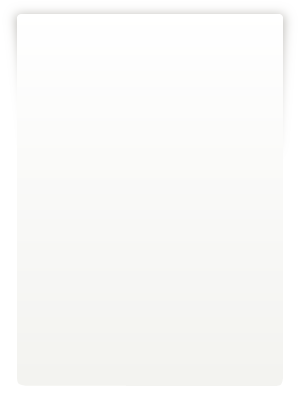
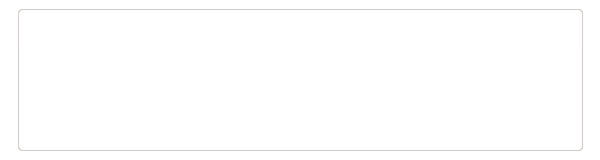
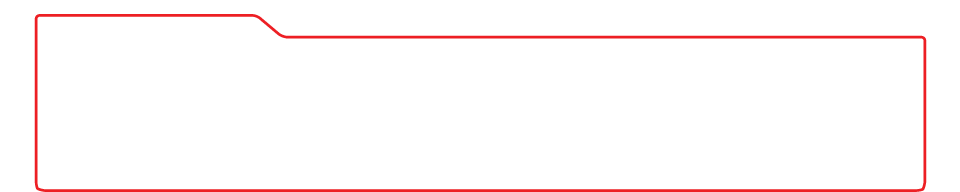
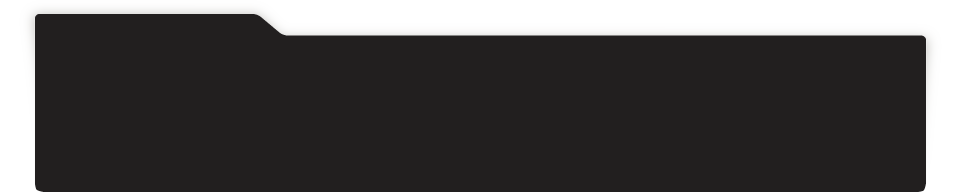
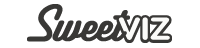
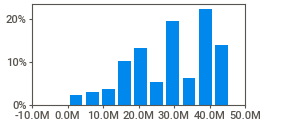
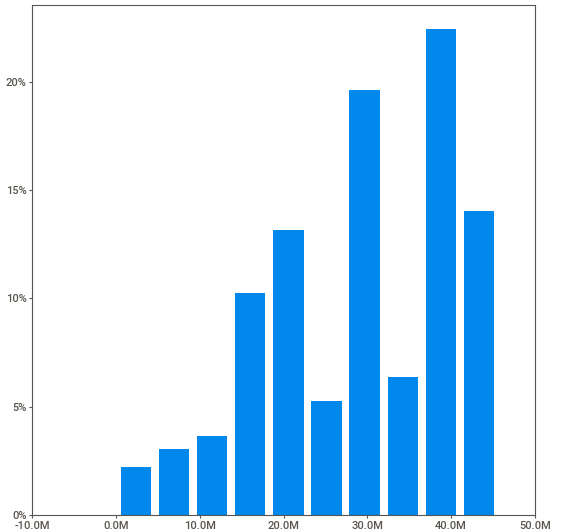
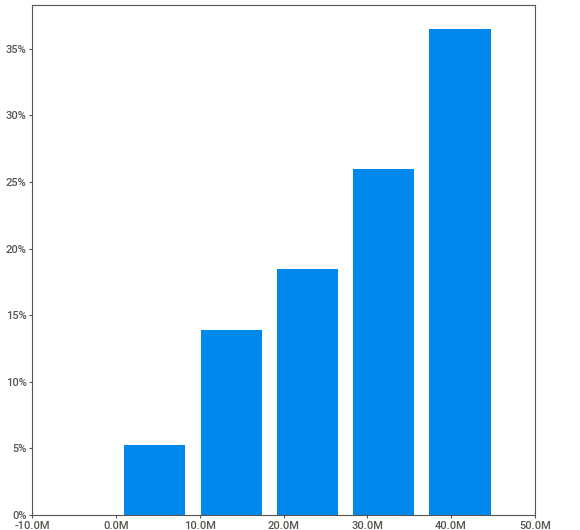
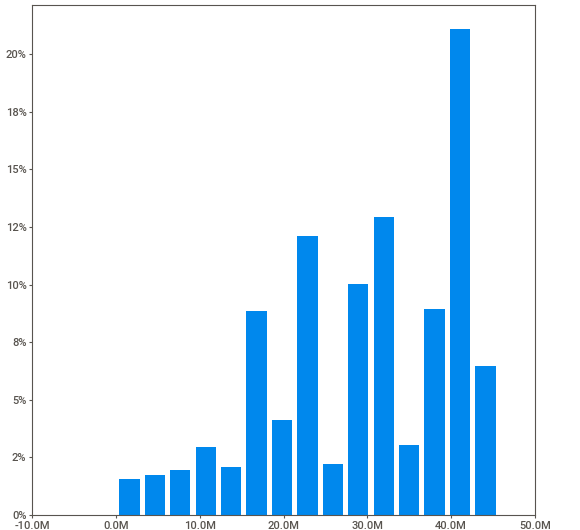
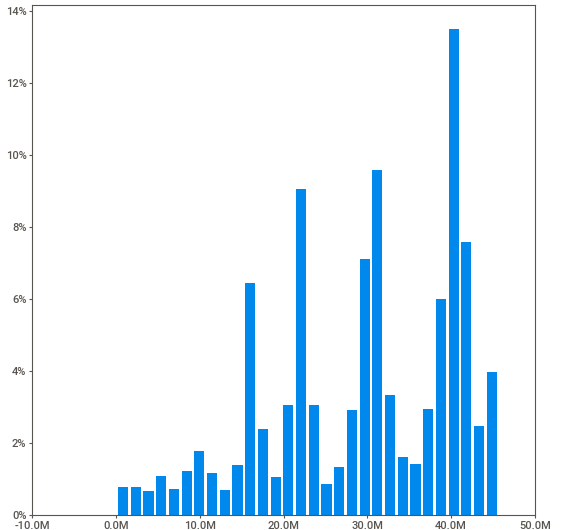
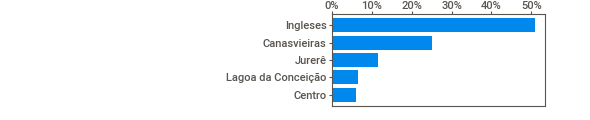
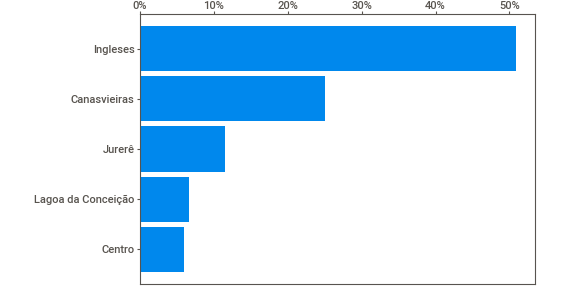
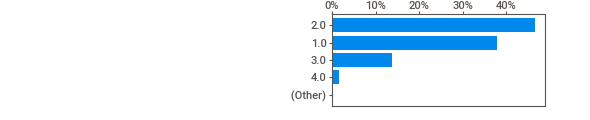
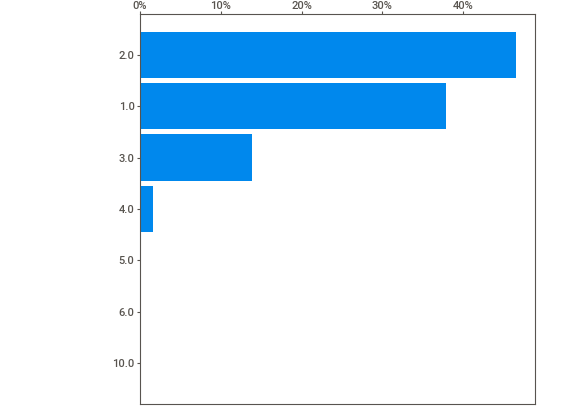
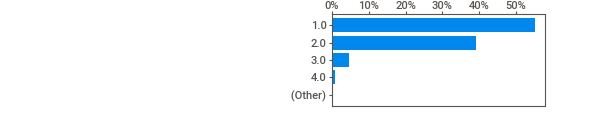
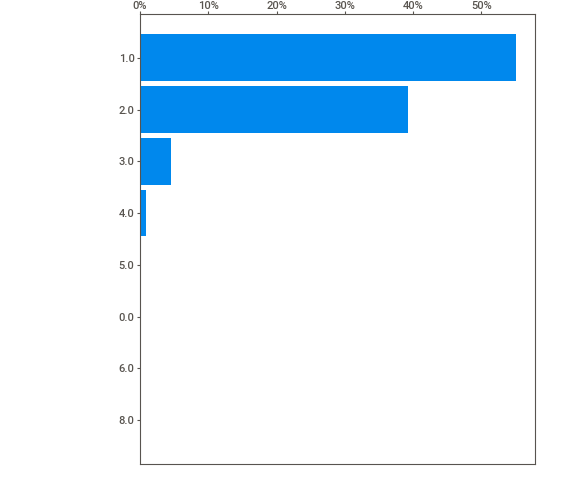
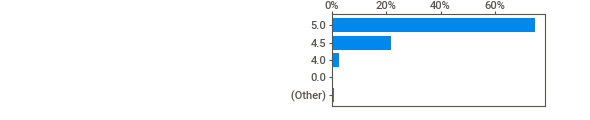
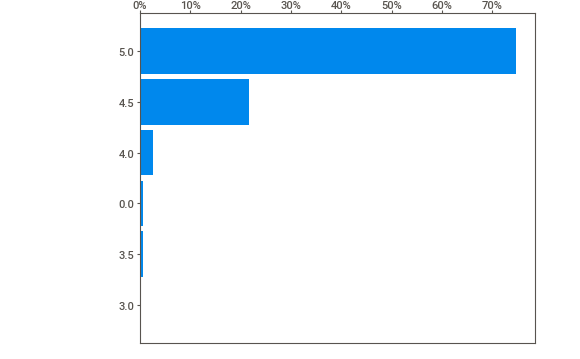
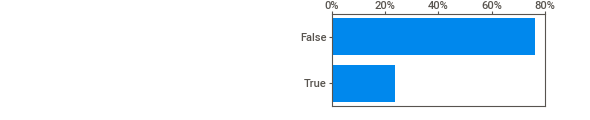
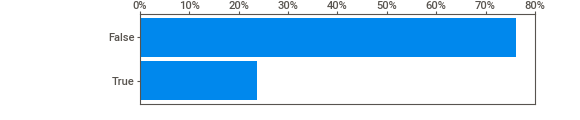
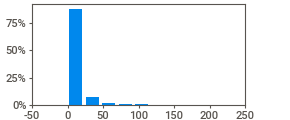
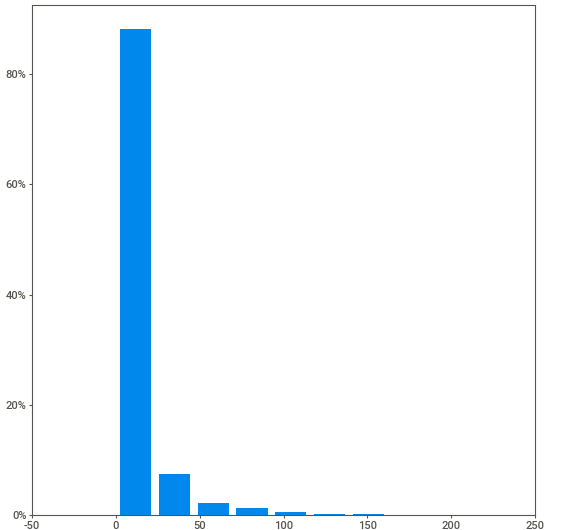
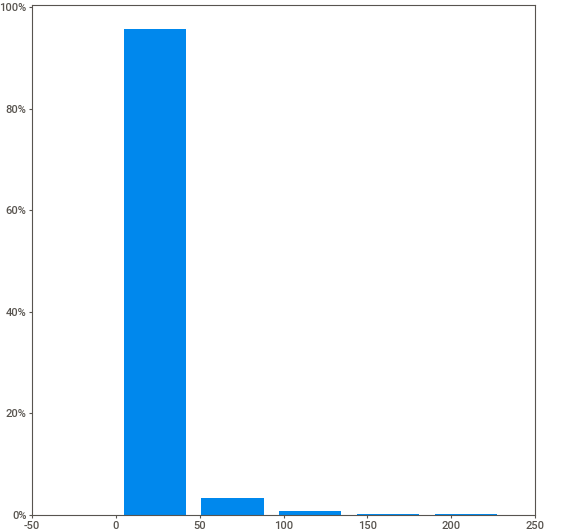
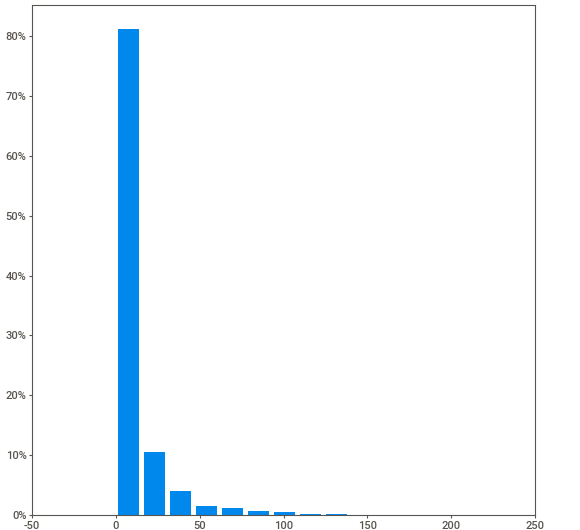
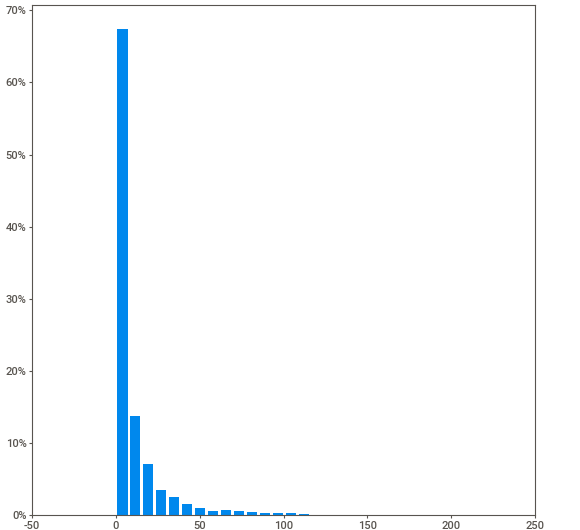
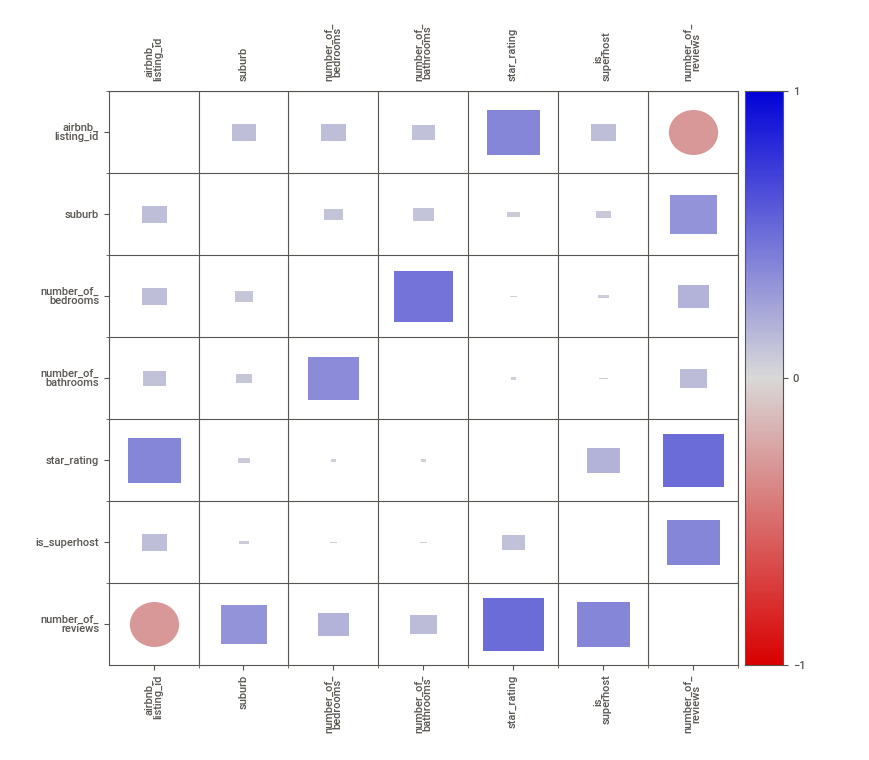
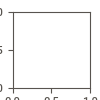

In [8]:
report_details.show_notebook()

* Criando um dataset conjunto

In [9]:
## Full outer join entre os datasets
airbnb = pd.merge(priceav, details, on = 'airbnb_listing_id', how = 'outer', indicator = True)
airbnb.shape

(355864, 13)

### 1. Ordene os bairros em ordem crescente de número de listings

In [10]:
listingSuburbs = details[['suburb','airbnb_listing_id']].groupby(['suburb']).nunique().sort_values(['airbnb_listing_id'], ascending=True)
listingSuburbs

,airbnb_listing_id
suburb,
Centro,278
Lagoa da Conceição,309
Jurerê,539
Canasvieiras,1177
Ingleses,2388


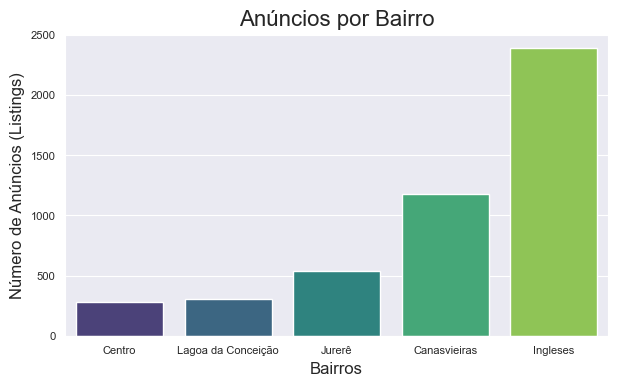

In [11]:
sns.set_style("darkgrid")
fig1, ax1 = plt.subplots(figsize=(7,4))
sns.barplot(x="suburb", y="airbnb_listing_id", palette = "viridis", 
            data=listingSuburbs.reset_index())
ax1.set_title("Anúncios por Bairro", fontsize = 16)
ax1.set_xlabel("Bairros", fontsize = 12)
ax1.set_ylabel("Número de Anúncios (Listings)", fontsize = 12)
ax1.set_alpha(0.8)

### 2. Ordene os bairros em ordem crescente de faturamento *médio* dos listings

* Lembrando que o faturamento de um anúncio é a **soma do preço das datas alugadas.**
* Vamos adicionar uma nova coluna chamada `income` (faturamento)

In [12]:
income_byListing = airbnb.query("booked_on !=''")[['airbnb_listing_id', 'suburb', 'price_string']]
income_byListing = income_byListing.groupby(['suburb', 'airbnb_listing_id'])
income_byListing = income_byListing.mean().reset_index().rename(columns={"price_string": "income_mean"})
income_byListing.head(3)

,suburb,airbnb_listing_id,income_mean
0,Canasvieiras,108658,367.164179
1,Canasvieiras,279586,244.642857
2,Canasvieiras,333619,161.013333


In [13]:
# Preparação dos dados de faturamento médio por bairro para plotagem
income_bySuburb = income_byListing[['suburb', 'income_mean']].groupby(['suburb']).mean().sort_values(['income_mean'], ascending=True)

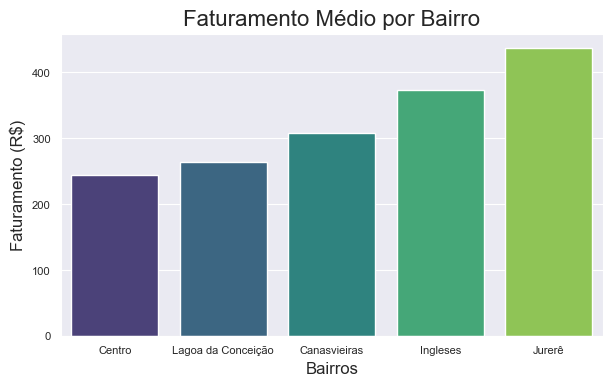

In [14]:
fig2, ax2 = plt.subplots(figsize=(7,4))
sns.barplot(x="suburb", y="income_mean", palette = "viridis", 
            data=income_bySuburb.reset_index())
ax2.set_title("Faturamento Médio por Bairro", fontsize = 16)
ax2.set_xlabel("Bairros", fontsize = 12)
ax2.set_ylabel("Faturamento (R$)", fontsize = 12)
ax2.set_alpha(0.8)

### 3. Existem correlações entre as características de um anúncio e seu faturamento? Quais? Explique


No heatmap gerado abaixo fica evidente que somente **uma** das variáveis selecionadas apresenta forte correlação com o faturamento médio dos anúncios. A análise indica que `price_string` tem uma forte correlação positiva com o faturamento (0.83).
Também podemos ressaltar que o faturamento médio tem moderada correlação positiva com o número de banheiros (`number_of_bathrooms` - 0.48) e Número de Estrelas (`star_rating` - 0.22). Uma moderada correlação negativa também é vista entre o faturamento médio e o número de reviews (`number_of_reviews` - 0.19). Podemos apontar também que o número de caracteres de anúncio (`ad_length`) e surpreendentemente a localização (`suburb`) não impactam tanto no faturamento, tendo uma fraca correlação positiva de 0.12.


Logo, com base nessa análise, podemos concluir que quanto maior o preço do anúncio maior seu faturamento médio, independemente da localização. O número de banheiros (variável correlacionada com o número de quartos - `number_of_bedrooms`, 0.33) assim como o número de estrelas têm um menor mais ainda importante papel no faturamento médio dos anúncios desse dataset.

In [36]:
##### Podemos começar a explorar as relações entre as variáveis fazendo algumas modificações no dataset `airbnb`
## Selecionamos apenas os listings que foram alugados

bookedListings = airbnb.query("booked_on !=''")

In [16]:
# Fazemos full outer join das listings alugadas com o dataset contendo o faturamento médio, usando 'airbnb_listing_id', 'suburb' como keys.

bookedListings = pd.merge(bookedListings, income_byListing, on = ['airbnb_listing_id', 'suburb'], how = 'outer').replace("", np.nan)
bookedListings.dropna() # Também removemos as rows contendo NaN.
bookedListings.head(3)

,airbnb_listing_id,booked_on,date,price_string,occupied,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,_merge,income_mean
0,40206270,2021-01-01 00:00:00,2021-01-01,380.0,1.0,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,both,239.125
1,40206270,2021-01-01 00:00:00,2021-01-02,380.0,1.0,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,both,239.125
2,40206270,2021-02-10 00:00:00,2021-02-10,195.0,1.0,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,both,239.125


In [17]:
bookedListings

,airbnb_listing_id,booked_on,date,price_string,occupied,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,_merge,income_mean
0,40206270,2021-01-01 00:00:00,2021-01-01,380.0,1.0,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,both,239.125
1,40206270,2021-01-01 00:00:00,2021-01-02,380.0,1.0,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,both,239.125
2,40206270,2021-02-10 00:00:00,2021-02-10,195.0,1.0,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,both,239.125
3,40206270,2021-02-10 00:00:00,2021-02-11,350.0,1.0,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,both,239.125
4,40206270,2021-02-10 00:00:00,2021-02-12,350.0,1.0,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,both,239.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166290,34392248,NaN,NaN,NaN,NaN,Ingleses,Lindo e acogedor apto en zona norte de la Isla,2.0,2.0,NaN,False,0.0,right_only,NaN
166291,44538969,NaN,NaN,NaN,NaN,Canasvieiras,"Ótimo apto no centro de Canas, a 450m do mar",1.0,1.0,NaN,False,0.0,right_only,NaN
166292,16609826,NaN,NaN,NaN,NaN,Jurerê,Agradável Apartamento em Jurerê Internacional,3.0,2.0,5.0,True,30.0,right_only,NaN
166293,31239515,NaN,NaN,NaN,NaN,Canasvieiras,Cobertura no centro 3 dormitorios com AR.,3.0,2.0,NaN,True,2.0,right_only,NaN


In [18]:
# Sumário da coluna Faturamento médio

bookedListings['income_mean'].describe()

count    164951.000000
mean        333.336057
std         163.326406
min          52.000000
25%         214.062500
50%         300.000000
75%         423.936170
max        1946.888889
Name: income_mean, dtype: float64

In [19]:
bookedListings['ad_name_length'] = bookedListings['ad_name'].str.len()

In [20]:
# Criar uma lista de colunas que não serão usadas na matriz de correlação:

removeCol = ['airbnb_listing_id', 'booked_on', 'ad_name', '_merge']
bookedListings = bookedListings.drop(removeCol, axis = 1)

In [21]:
labelencoder=LabelEncoder()
for column in bookedListings.columns:
    bookedListings[column] = labelencoder.fit_transform(bookedListings[column])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'date'),
  Text(0, 1.5, 'price_string'),
  Text(0, 2.5, 'occupied'),
  Text(0, 3.5, 'suburb'),
  Text(0, 4.5, 'number_of_bedrooms'),
  Text(0, 5.5, 'number_of_bathrooms'),
  Text(0, 6.5, 'star_rating'),
  Text(0, 7.5, 'is_superhost'),
  Text(0, 8.5, 'number_of_reviews'),
  Text(0, 9.5, 'income_mean'),
  Text(0, 10.5, 'ad_name_length')])

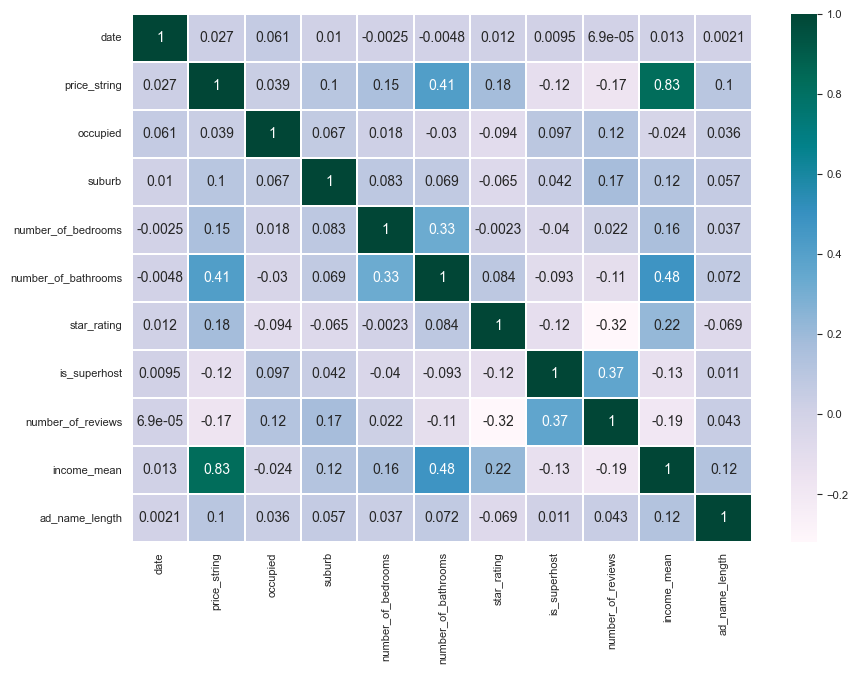

In [22]:
plt.figure(figsize=(10, 7))
sns.heatmap(bookedListings.corr(),linewidths=.1,cmap="PuBuGn", annot=True)
plt.yticks(rotation=0)

### 4. Qual a antecedência média das reservas?

* **Resposta**: Após a análise abaixo podemos concluir que a antecedência média das reservas é de aproximadamente 31 dias ou um mês. Contudo, devido ao alto desvio padrão a mediana é um melhor indicativo da tendência central dessa distribuição sendo essa de apenas 9 dias. 

####  Esse número é maior ou menor para finais de semana?
* **Resposta**: A análise indica (vide gráfico 4) que os finais de semana - Sábado e Domingo - são os dias em que menos ocorre reservas. Os dias em que há um maior número de reservas são às Terças e Sextas-feiras.

In [23]:
bookedListings = airbnb.query("booked_on !=''").replace("", np.nan).dropna()
bookedListings.head(3)

,airbnb_listing_id,booked_on,date,price_string,occupied,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,_merge
297,30016093,2020-09-16 00:00:00,2020-12-01,256.0,1.0,Centro,Apartamento Beira Mar Norte,1.0,1.0,5.0,False,6.0,both
298,30016093,2020-09-16 00:00:00,2020-12-02,256.0,1.0,Centro,Apartamento Beira Mar Norte,1.0,1.0,5.0,False,6.0,both
299,30016093,2020-09-16 00:00:00,2020-12-03,256.0,1.0,Centro,Apartamento Beira Mar Norte,1.0,1.0,5.0,False,6.0,both


In [24]:
# Conversão das variáveis 'booked_on' e 'date' para datetime & criação da coluna de antecedência ('days_in_advance') como timedelta.

bookedListings['booked_on'] = pd.to_datetime(bookedListings['booked_on'])
bookedListings['date'] = pd.to_datetime(bookedListings['date'])
bookedListings['days_in_advance'] = pd.to_timedelta(bookedListings['date'] - bookedListings['booked_on'])

In [25]:
# Sumário da coluna criada 'day_in_advance'

bookedListings['days_in_advance'].describe()

count                         98126
mean     31 days 21:29:40.152049406
std      58 days 23:37:46.238302678
min                 0 days 00:00:00
25%                 1 days 00:00:00
50%                 9 days 00:00:00
75%                36 days 00:00:00
max               368 days 00:00:00
Name: days_in_advance, dtype: object

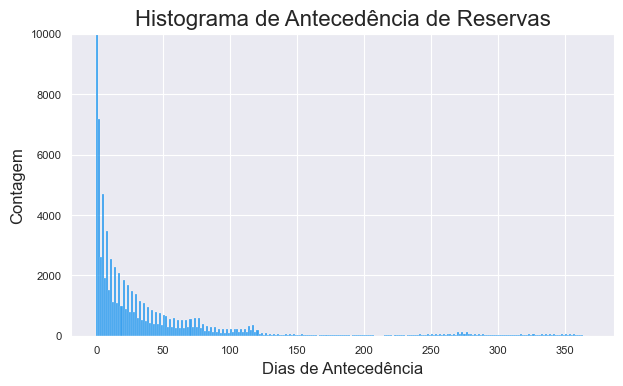

In [26]:
### FIGURA 3

# Histograma que mostra a distribuição da antecedência de aluguel dos anúncios. 
# Percebe-se que a distribuição é altamente enviesada pela direita (assimétrica positiva)

fig3, ax3 = plt.subplots(figsize=(7,4))
sns.histplot(x = bookedListings['days_in_advance'].astype('timedelta64[D]'))
ax3.set_title("Histograma de Antecedência de Reservas", fontsize = 16)
ax3.set_ylabel("Contagem", fontsize = 12)
ax3.set_xlabel("Dias de Antecedência", fontsize = 12)
plt.ylim(0, 10000)
ax3.set_alpha(0.8)

In [27]:
# Preparação dos dados de agendamento para plotagem

bookedListings['booked_on_weekday'] = bookedListings['booked_on'].dt.day_name()
weekday_booked = bookedListings['booked_on_weekday'].value_counts().sort_values(ascending=True)
weekday_booked = pd.DataFrame(weekday_booked)
weekday_booked = weekday_booked.reset_index().rename(columns={'index': 'day_name', 'booked_on_weekday':'sum_booked'})
weekday_booked

,day_name,sum_booked
0,Sunday,11293
1,Saturday,11797
2,Monday,12649
3,Thursday,13930
4,Wednesday,15019
5,Tuesday,16267
6,Friday,17171


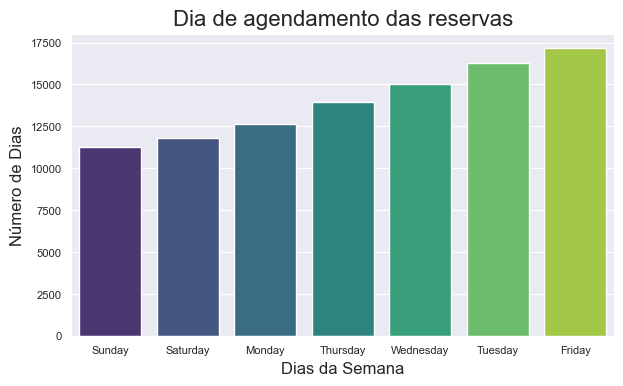

In [28]:
### FIGURA 4

fig4, ax4 = plt.subplots(figsize=(7,4))
sns.barplot(x="day_name", y="sum_booked", palette = "viridis", 
            data=weekday_booked)
ax4.set_title("Dia de agendamento das reservas", fontsize = 16)
ax4.set_xlabel("Dias da Semana", fontsize = 12)
ax4.set_ylabel("Número de Dias", fontsize = 12)
ax4.set_alpha(0.8)

### 5. Quais são os dias em que há mais reservas?

* **Resposta**: Observando o value_counts() da variável `day_name` vemos que há pouquissima diferença na distribuição das reservas, indicando uma certa homogeneidade. Esse fato também é observado no boxplot abaixo (Figura 5).

####  E esse número é maior ou menor para finais de semana? Os feriados influenciam as reservas?
* **Resposta**: Somente pelo gráfico é difícil determinar se os finais de semana influenciam a escolha das reservas. Um teste estatístico resolveria essa questão (Possivelmente One-way ANOVA com Tukey-Test como Ad-hoc). Nota-se que em 2021 os dias mais alugados foram os dias do período 12 a 14 de Fevereiro (Carnaval) e 28 de Dezembro a 02 de Janeiro (Recesso de Final de Ano e Ano Novo)

In [31]:
booked = pd.DataFrame(bookedListings['date'].value_counts()).reset_index().rename(columns={'index': 'date', 'date':'booked_count'})
booked['day_name'] = booked['date'].dt.day_name()
booked.head(10) 

,date,booked_count,day_name
0,2021-02-13,1836,Saturday
1,2021-02-14,1790,Sunday
2,2021-02-12,1410,Friday
3,2021-01-01,1202,Friday
4,2020-12-31,1196,Thursday
5,2020-12-30,1161,Wednesday
6,2021-01-02,1097,Saturday
7,2020-12-29,1080,Tuesday
8,2020-12-28,1010,Monday
9,2020-12-27,949,Sunday


In [35]:
booked.shape

(149, 3)

In [33]:
booked['day_name'].value_counts()

Tuesday      22
Monday       22
Saturday     21
Sunday       21
Friday       21
Thursday     21
Wednesday    21
Name: day_name, dtype: int64

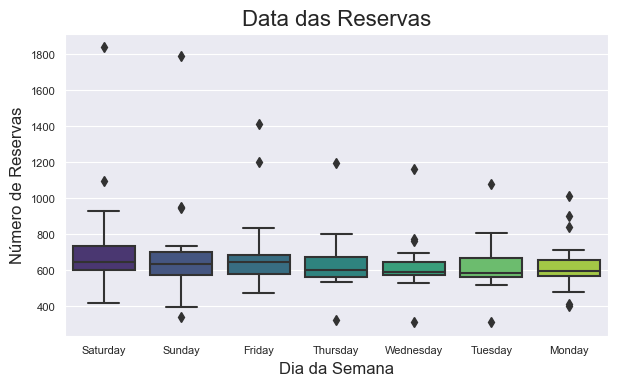

In [30]:
### FIGURA 5

# Pelo gráfico é difícil determinar quais dias da semana são os mais reservados. Pelo senso comum Sábado e Domingo 

fig5, ax5 = plt.subplots(figsize=(7,4))
sns.boxplot(x="day_name", y="booked_count", palette = "viridis", 
            data=booked)
ax5.set_title("Data das Reservas", fontsize = 16)
ax5.set_xlabel("Dia da Semana", fontsize = 12)
ax5.set_ylabel("Número de Reservas", fontsize = 12)
ax5.set_alpha(0.8)